Epoch 1/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8454 - loss: 0.5046 - val_accuracy: 0.9778 - val_loss: 0.0777
Epoch 2/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9756 - loss: 0.0769 - val_accuracy: 0.9832 - val_loss: 0.0609
Epoch 3/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9841 - loss: 0.0530 - val_accuracy: 0.9860 - val_loss: 0.0474
Epoch 4/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9875 - loss: 0.0387 - val_accuracy: 0.9868 - val_loss: 0.0465
Epoch 5/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9906 - loss: 0.0295 - val_accuracy: 0.9877 - val_loss: 0.0424
Epoch 6/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9924 - loss: 0.0229 - val_accuracy: 0.9900 - val_loss: 0.0378
Epoch 7/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9941 - loss: 0.0184 - val_accuracy: 0.9908 - val_loss: 0.0394


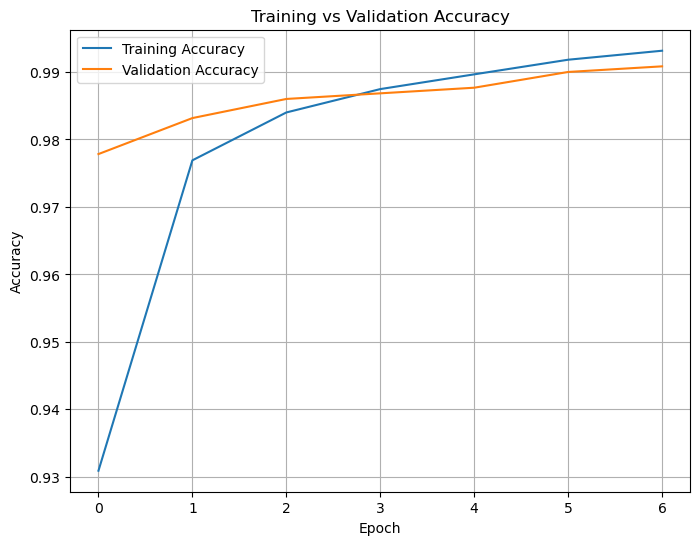

313/313 - 1s - 4ms/step - accuracy: 0.9888 - loss: 0.0346
Test Accuracy: 0.9888
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


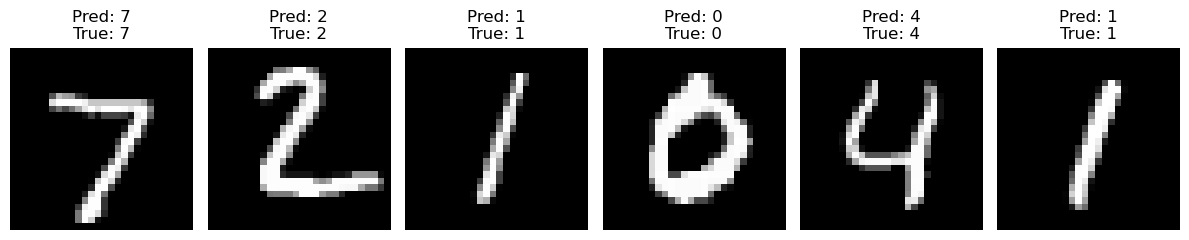

In [11]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data preprocessing: Normalize and reshape images
train_images = train_images[..., np.newaxis].astype('float32') / 255.0
test_images = test_images[..., np.newaxis].astype('float32') / 255.0

# Define a modified LeNet-5 model
cnn_model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
try:
    training_history = cnn_model.fit(
        train_images, train_labels, 
        epochs=7, 
        batch_size=64, 
        validation_split=0.1
    )
except ValueError as e:
    print(f"Error during training: {e}")

# Plot training accuracy and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate predictions on test data
predicted_labels = cnn_model.predict(test_images)

# Plot predictions vs actual labels
def display_predictions(images, true_labels, predicted_probs, num_samples=6):
    plt.figure(figsize=(12, 4))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {np.argmax(predicted_probs[i])}\nTrue: {true_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_predictions(test_images, test_labels, predicted_labels)
